# Reuters Classifier based on book "Deep Learning with Python", chapter 3.5

In [1]:
!pip install numpy==1.16.1 tensorflow keras

In [2]:
%matplotlib inline
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import reuters

### Downloading Dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print("Train data: ", len(train_data), " , ", len(train_labels), "\nTest data: ", len(test_data), " , ", len(test_labels))

Train data:  8982  ,  8982 
Test data:  2246  ,  2246


### Decoding to text (example)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Preparing the Data

In [5]:
print(train_data,"\n\n\n")
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
print(x_train, "\n", x_train.shape)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

### Converting to One-Hot

In [6]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


### Validation Dataset

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Network Architecture

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


### Network Training

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 82us/sample - loss: 2.6491 - acc: 0.5385 - val_loss: 1.7293 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 0s 57us/sample - loss: 1.4209 - acc: 0.7021 - val_loss: 1.2946 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 0s 56us/sample - loss: 1.0495 - acc: 0.7774 - val_loss: 1.1182 - val_acc: 0.7570
Epoch 4/20
7982/7982 [==============================] - 0s 55us/sample - loss: 0.8252 - acc: 0.8311 - val_loss: 1.0418 - val_acc: 0.7730
Epoch 5/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.6559 - acc: 0.8657 - val_loss: 0.9524 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.5224 - acc: 0.8906 - val_loss: 0.9186 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 0s 55us/sample - loss: 0.4211 - acc: 0.9127 - val_loss: 0.9070 - val_acc: 

### Network Evaluation

In [10]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 63us/sample - loss: 1.2290 - acc: 0.7827
[1.2289533532313333, 0.78272486]


### Plotting Training and Validation Loss

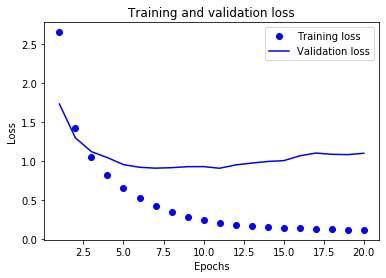

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting Training and Validation Accuracy

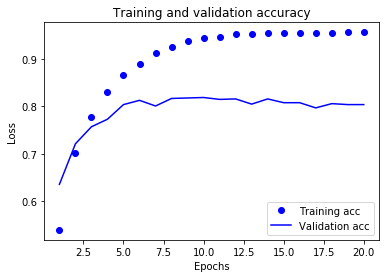

In [12]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## First Alternative Network: using MSE as loss function instead of categorical cross-entropy

### Network Architecture

In [13]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


### Network Training

In [14]:
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.1076 - acc: 0.9575 - val_loss: 1.1516 - val_acc: 0.8000
Epoch 2/20
7982/7982 [==============================] - 0s 61us/sample - loss: 0.1084 - acc: 0.9564 - val_loss: 1.0994 - val_acc: 0.8020
Epoch 3/20
7982/7982 [==============================] - 1s 63us/sample - loss: 0.1042 - acc: 0.9575 - val_loss: 1.2109 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.1066 - acc: 0.9578 - val_loss: 1.1199 - val_acc: 0.8070
Epoch 5/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.0990 - acc: 0.9590 - val_loss: 1.2474 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 0s 59us/sample - loss: 0.1009 - acc: 0.9579 - val_loss: 1.1983 - val_acc: 0.7950
Epoch 7/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.1013 - acc: 0.9563 - val_loss: 1.2178 - val_acc: 

### Network Evaluation

In [15]:
results2 = model2.evaluate(x_test, one_hot_test_labels)
print(results2)

2246/2246 [==============================] - 0s 69us/sample - loss: 0.0213 - acc: 0.0227
[0.021267225710427985, 0.022707034]


### Plotting Training and Validation Loss

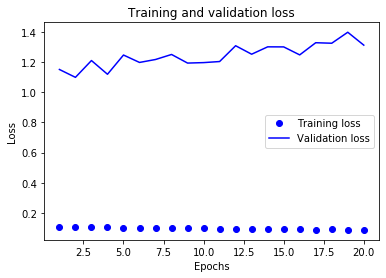

In [16]:
import matplotlib.pyplot as plt

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting training and Validation Accuracy

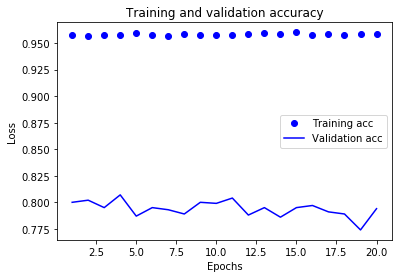

In [17]:
plt.clf()   # clear figure

acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Second Alternative Network: Using "natural" encoding, sigmoid activation in the output layer and binary cross-entropy loss instead of categorical

### From one-hot representation to "natural" representation

In [18]:
M = np.int(np.ceil(np.log2(np.max(train_labels)+1))) # Number of bits needed to represent all lables available
train_labels_natural = np.zeros([train_labels.shape[0], M]) #Array which will contain binary representation
test_labels_natural = np.zeros([test_labels.shape[0], M])
print(train_labels_natural.shape, test_labels_natural.shape)

(8982, 6) (2246, 6)


In [19]:
# Train Labels
for i in range(len(train_labels)):
    a = np.array([np.int(x) for x in bin(train_labels[i])[2:]]) # transforming to binary representation
    train_labels_natural[i,:] = np.pad(a,(6-len(a) if len(a)!=6 else 0 ,0),'constant',constant_values=(0)) # Filling values with zeros to complete 6 bits
    
# Test Labels
for i in range(len(test_labels)):
    a = np.array([np.int(x) for x in bin(test_labels[i])[2:]]) # transforming to binary representation
    test_labels_natural[i,:] = np.pad(a,(6-len(a) if len(a)!=6 else 0 ,0),'constant',constant_values=(0)) # Filling values with zeros to complete 6 bits
    
print()

In [20]:
y_val = train_labels_natural[:1000]
partial_y_train = train_labels_natural[1000:]

### Network Architecture

In [21]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(6, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 390       
Total params: 644,614
Trainable params: 644,614
Non-trainable params: 0
_________________________________________________________________


### Network Training

In [22]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 74us/sample - loss: 0.4826 - acc: 0.7996 - val_loss: 0.3656 - val_acc: 0.8607
Epoch 2/20
7982/7982 [==============================] - 0s 58us/sample - loss: 0.3110 - acc: 0.8812 - val_loss: 0.3041 - val_acc: 0.8785
Epoch 3/20
7982/7982 [==============================] - 0s 58us/sample - loss: 0.2431 - acc: 0.9117 - val_loss: 0.2801 - val_acc: 0.8878
Epoch 4/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.2033 - acc: 0.9287 - val_loss: 0.2724 - val_acc: 0.8902
Epoch 5/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.1696 - acc: 0.9454 - val_loss: 0.2635 - val_acc: 0.8962
Epoch 6/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.1487 - acc: 0.9532 - val_loss: 0.2641 - val_acc: 0.8980
Epoch 7/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.1285 - acc: 0.9619 - val_loss: 0.2665 - val_acc: 

### Network Evaluation

In [23]:
results3 = model3.evaluate(x_test, test_labels_natural)
print(results3)

2246/2246 [==============================] - 0s 60us/sample - loss: 0.4403 - acc: 0.8917
[0.4403418853467634, 0.8916591]


### Plotting Training and Validation Loss

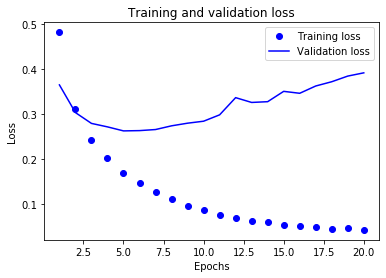

In [24]:
import matplotlib.pyplot as plt

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.plot(epochs3, loss3, 'bo', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting training and Validation Accuracy

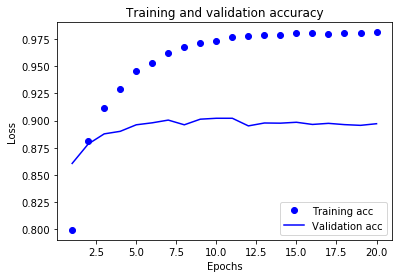

In [25]:
plt.clf()   # clear figure

acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
plt.plot(epochs3, acc3, 'bo', label='Training acc')
plt.plot(epochs3, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()